In [363]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [364]:
NUMBER_OF_CORES = 8

In [365]:
def call_function_for_groups(func, groups, **params):
    for group in groups:
        func(group, params)

In [366]:
def calculate_T1_time(file_path):
    def plot(values, number_of_points1):
        plt.scatter(np.arange(1, 11), y=values.values)
        plt.xticks(np.arange(1, 11))
        plt.xlabel("Numer proby")
        plt.ylabel("Czas uruchomienia (s)")
        plt.title("Czas wykonania T1 dla n=" + str(number_of_points1) + " punktow")
        plt.legend(["Mean: " + str(values.mean()) + ",\n Min: " + str(values.min()) + 
                    "\n Max: " + str(values.max())])
        plt.show()
        return values.mean()
    
    file = pd.read_csv(file_path)
    first = file.query('points==10000')
    second = file.query('points==100000000')
    last = file.query('points==500000000')
    
    first_mean = plot(first['time'], 10000)
    second_mean = plot(second['time'], 100000000)
    last_mean = plot(last['time'], 500000000 )
    return first_mean, second_mean, last_mean
    print (first_mean, second_mean)
#     return first_mean, second_mean, None

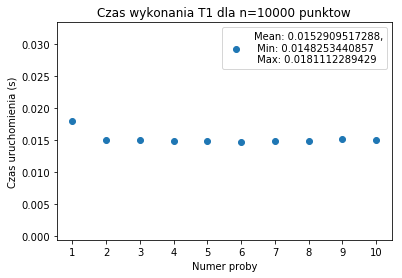

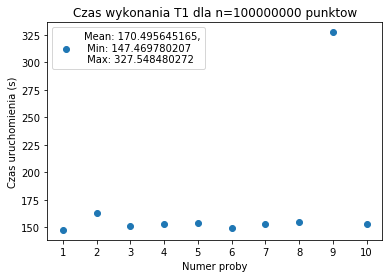

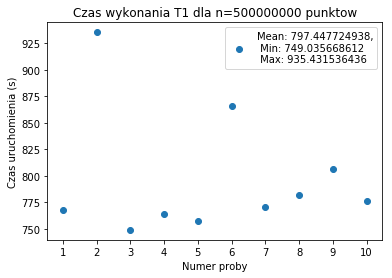

In [367]:
first_mean, second_mean, last_mean = calculate_T1_time("pi/results_scalable_t1.txt")

In [368]:
file_path = "pi/results_scalable_v2.txt"
csv = pd.read_csv(file_path)
print (csv)

          time        pi  proc     points
0     0.017682  3.141200     1      10000
1     0.015318  3.126400     2      10000
2     0.015181  3.134400     3      10000
3     0.015299  3.141900     4      10000
4     0.015390  3.140560     5      10000
5     0.015458  3.143867     6      10000
6     0.020481  3.140629     7      10000
7     0.028362  3.143300     8      10000
8   147.303900  3.141751     1  100000000
9   152.993256  3.141528     2  100000000
10  150.803446  3.141445     3  100000000
11  151.949884  3.141556     4  100000000
12  156.963917  3.141529     5  100000000
13  158.124833  3.141521     6  100000000
14  152.844666  3.141607     7  100000000
15  151.938042  3.141652     8  100000000
16  786.294801  3.141610     1  500000000
17  777.576188  3.141654     2  500000000
18  785.787763  3.141628     3  500000000
19  821.974979  3.141604     4  500000000
20  768.184667  3.141622     5  500000000
21  774.389249  3.141606     6  500000000
22  790.103426  3.141599     7  50

In [369]:
grouped_by = csv.groupby('proc', axis=0)

In [370]:
first_group = grouped_by.nth(n=0)
second_group = grouped_by.nth(n=1)
last_group = grouped_by.nth(n=2)

In [371]:
# TODO: zaimplementowac wykres przedstawiajacy dokladnosc liczby pi w zaleznosci od corow
def plot_accuracy(group):
    pass

In [372]:
plot_accuracy(first_group)
plot_accuracy(second_group)
plot_accuracy(last_group)

In [373]:
# TODO: czas dzialania w zaleznosci od liczby corow
def plot_time_of_execution(group, scalable=True):
    print (group)
    time = group['time']
    points = group['points'].mean()
    if scalable:
        plt.title("Czas wykonania. Kazdy rdzeni losuje " + str(int(points)) + " punktow")
    else:
        plt.title("Czas wykonania. Calkowta liczba punkto wynosi " + str(int(points)))
    plt.scatter(np.arange(1,NUMBER_OF_CORES+1), y=time)
    plt.xticks(np.arange(1,NUMBER_OF_CORES+1))
    plt.show()

            pi  points      time
proc                            
1     3.141200   10000  0.017682
2     3.126400   10000  0.015318
3     3.134400   10000  0.015181
4     3.141900   10000  0.015299
5     3.140560   10000  0.015390
6     3.143867   10000  0.015458
7     3.140629   10000  0.020481
8     3.143300   10000  0.028362


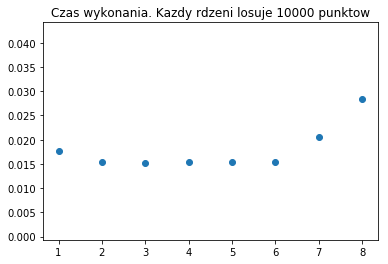

            pi     points        time
proc                                 
1     3.141751  100000000  147.303900
2     3.141528  100000000  152.993256
3     3.141445  100000000  150.803446
4     3.141556  100000000  151.949884
5     3.141529  100000000  156.963917
6     3.141521  100000000  158.124833
7     3.141607  100000000  152.844666
8     3.141652  100000000  151.938042


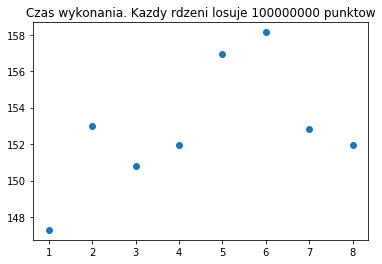

            pi     points        time
proc                                 
1     3.141610  500000000  786.294801
2     3.141654  500000000  777.576188
3     3.141628  500000000  785.787763
4     3.141604  500000000  821.974979
5     3.141622  500000000  768.184667
6     3.141606  500000000  774.389249
7     3.141599  500000000  790.103426
8     3.141597  500000000  801.959241


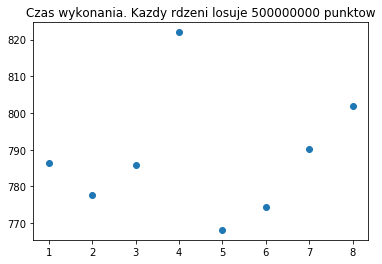

In [374]:
call_function_for_groups(
    plot_time_of_execution, [first_group, second_group, last_group], scalable=True)

In [375]:
def plot_speedup(group, time_for_one, scalable):
    speedup = []
    for index, row in group.iterrows():
        if scalable:
            value = (time_for_one / row['time']) * index
        else:
            value = (time_for_one / row['time'])
        speedup.append(value)
    points = group['points'].mean()
    if scalable:
        plt.title("Speedup scalable, kazdy rdzen losuje " + str(int(points)) + " punktow")
    else:
        plt.title("Speedup, liczba punktow wynosi " + str(int(points)))
    plt.xlabel('Liczba rdzeni')
    plt.ylabel("Speedup")
    plt.plot(np.arange(1,NUMBER_OF_CORES+1), np.arange(1,NUMBER_OF_CORES+1), 'r--')
    plt.text(1, 5, 'Krzywa teoretyczna')
    plt.scatter(np.arange(1, NUMBER_OF_CORES+1), y=speedup)
    plt.xticks(np.arange(1,NUMBER_OF_CORES+1))
    plt.show()

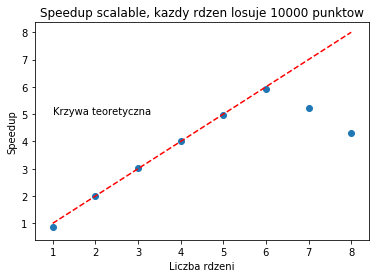

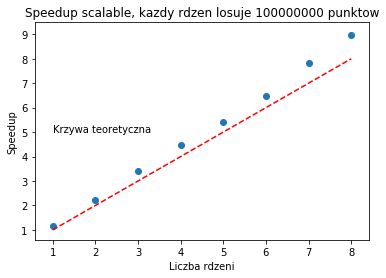

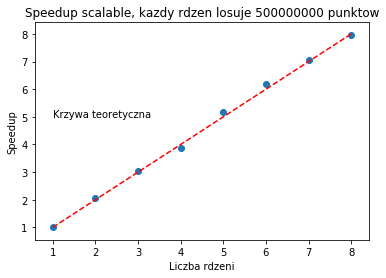

In [376]:
plot_speedup(first_group, time_for_one = first_mean, scalable=True)
plot_speedup(second_group, time_for_one = second_mean, scalable=True)
plot_speedup(last_group, time_for_one = last_mean, scalable=True)




In [377]:
def plot_efficiency(group, time_for_one, scalable):
    points = group['points'].mean()
    eff = []
    for index, row in group.iterrows():
        if scalable:
            value = (time_for_one / row['time'])
        else:
            value = (time_for_one / row['time']) / index
        eff.append(value)
    if scalable:
        plt.title("Efficiency scalable, kazdy rdzen losuje " + str(int(points)) + " punktow")
    else:
        plt.title("Efficiency, sumaryczna liczba punkto wynosi " + str(int(points)))
    plt.xlabel('Liczba rdzeni')
    plt.ylabel("Efficiency")
    plt.scatter(np.arange(1,NUMBER_OF_CORES+1), eff)
    plt.xticks(np.arange(1,NUMBER_OF_CORES+1))
    plt.show()

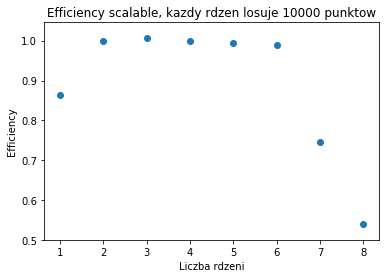

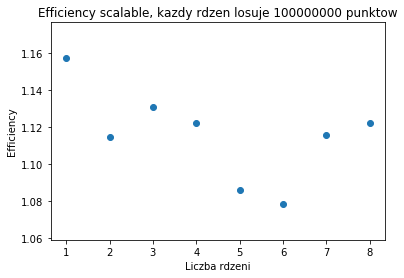

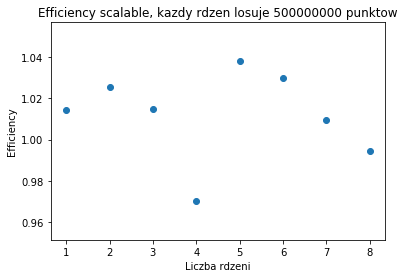

In [378]:
plot_efficiency(first_group, first_mean, scalable=True)
plot_efficiency(second_group, second_mean, scalable=True)
plot_efficiency(last_group, last_mean, scalable=True)


In [379]:
def plot_serialfraction(group, time_for_one, scalable):
    serial_fraction = []
    for index, row in group.iterrows():
        if scalable:
            speedup = (time_for_one / row['time']) * index
        else:
            speedup = (time_for_one / row['time'])
        speedup_value = speedup
        sf_value = (1/speedup_value - 1/index) / (1 - 1/index)
        serial_fraction.append(sf_value)
    points = group['points'].mean()
    if scalable:
        plt.title("Serial fraction scalable, kazdy rdzen losuje " + str(int(points)) + " punktow")
    else:
        plt.title("Serial fraction, liczba punktow " + str(int(points)))
    plt.xlabel('Liczba rdzeni')
    plt.ylabel("Serial fraction")
    plt.scatter(np.arange(1, NUMBER_OF_CORES+1), y=serial_fraction)
    plt.xticks(np.arange(1,NUMBER_OF_CORES+1))
    plt.show()

/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


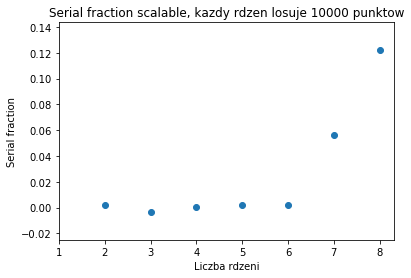

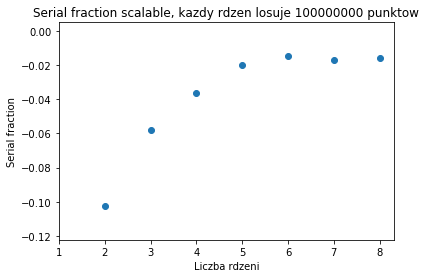

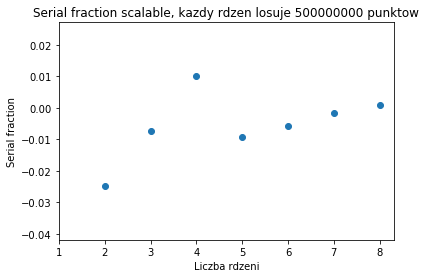

In [380]:
plot_serialfraction(first_group, first_mean, scalable=True)
plot_serialfraction(second_group, second_mean, scalable=True)
plot_serialfraction(last_group, last_mean, scalable=True)

In [381]:
#
# ,--.  ,--.,-----.,--.  ,--.     ,---.  ,-----. ,---. ,--.    ,---. ,-----. ,--.  ,------. 
# |  ,'.|  '  .-.  |  ,'.|  |    '   .-''  .--.//  O  \|  |   /  O  \|  |) /_|  |  |  .---' 
# |  |' '  |  | |  |  |' '  |    `.  `-.|  |   |  .-.  |  |  |  .-.  |  .-.  |  |  |  `--,  
# |  | `   '  '-'  |  | `   ,----.-'    '  '--'|  | |  |  '--|  | |  |  '--' |  '--|  `---. 
# `--'  `--'`-----'`--'  `--'----`-----' `-----`--' `--`-----`--' `--`------'`-----`------' 
#

In [382]:
file_path = "pi/results_nonscalable_v2.txt"
csv = pd.read_csv(file_path)
print (csv)
grouped_by = csv.groupby('proc', axis=0)
first_group = grouped_by.nth(n=0)
second_group = grouped_by.nth(n=1)
last_group = grouped_by.nth(n=2)

          time        pi  proc     points
0     0.015075  3.133200     1      10000
1     0.007838  3.152000     2      10000
2     0.005402  3.123600     3      10000
3     0.011276  3.152400     4      10000
4     0.003554  3.127200     5      10000
5     0.008916  3.180800     6      10000
6     0.012359  3.119200     7      10000
7     0.003362  3.132800     8      10000
8   156.555125  3.141646     1  100000000
9    77.366416  3.141532     2  100000000
10   49.795954  3.141912     3  100000000
11   38.877074  3.141566     4  100000000
12   31.057047  3.141506     5  100000000
13   25.931837  3.141550     6  100000000
14   22.251457  3.141430     7  100000000
15   19.509623  3.141653     8  100000000
16  833.022220  3.141618     1  500000000
17  393.749649  3.141644     2  500000000
18  264.755649  3.141684     3  500000000
19  199.825974  3.141605     4  500000000
20  159.985952  3.141689     5  500000000
21  130.238497  3.141741     6  500000000
22  112.443217  3.141541     7  50

In [383]:
plot_accuracy(first_group)
plot_accuracy(second_group)
plot_accuracy(last_group)

          pi  points      time
proc                          
1     3.1332   10000  0.015075
2     3.1520   10000  0.007838
3     3.1236   10000  0.005402
4     3.1524   10000  0.011276
5     3.1272   10000  0.003554
6     3.1808   10000  0.008916
7     3.1192   10000  0.012359
8     3.1328   10000  0.003362


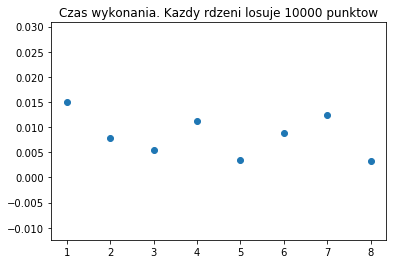

            pi     points        time
proc                                 
1     3.141646  100000000  156.555125
2     3.141532  100000000   77.366416
3     3.141912  100000000   49.795954
4     3.141566  100000000   38.877074
5     3.141506  100000000   31.057047
6     3.141550  100000000   25.931837
7     3.141430  100000000   22.251457
8     3.141653  100000000   19.509623


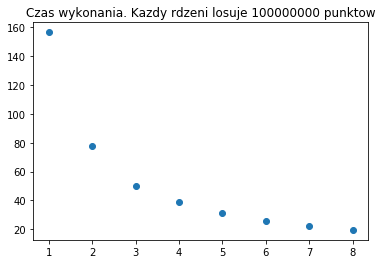

            pi     points        time
proc                                 
1     3.141618  500000000  833.022220
2     3.141644  500000000  393.749649
3     3.141684  500000000  264.755649
4     3.141605  500000000  199.825974
5     3.141689  500000000  159.985952
6     3.141741  500000000  130.238497
7     3.141541  500000000  112.443217
8     3.141662  500000000  100.045475


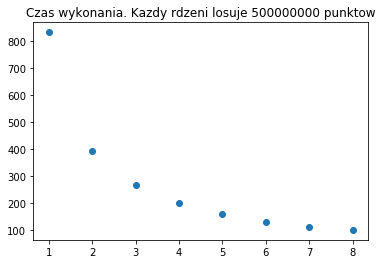

In [384]:
call_function_for_groups(
    plot_time_of_execution, [first_group, second_group, last_group], scalable=False)

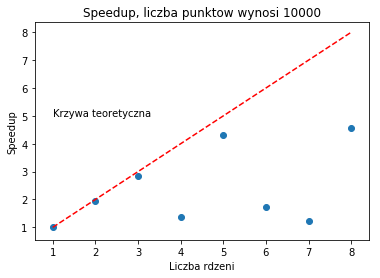

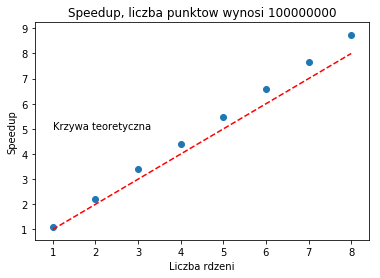

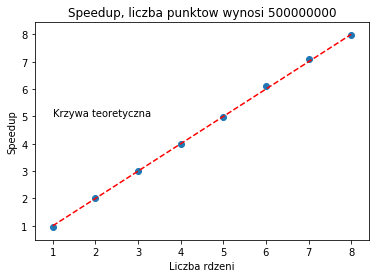

In [390]:
plot_speedup(first_group, time_for_one = first_mean, scalable=False)
plot_speedup(second_group, time_for_one = second_mean, scalable=False)
plot_speedup(last_group, time_for_one = last_mean, scalable=False)


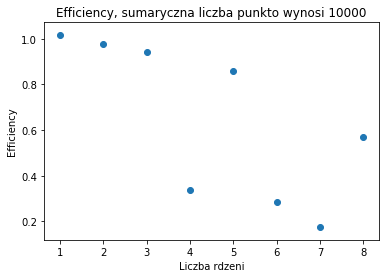

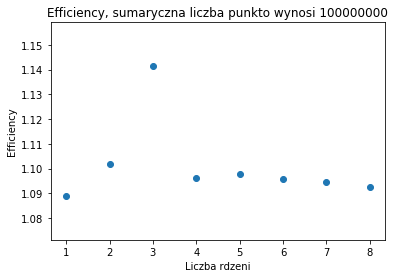

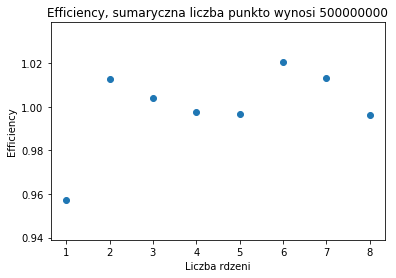

In [388]:
plot_efficiency(first_group, first_mean, scalable=False)
plot_efficiency(second_group, second_mean, scalable=False)
plot_efficiency(last_group, last_mean, scalable=False)


/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


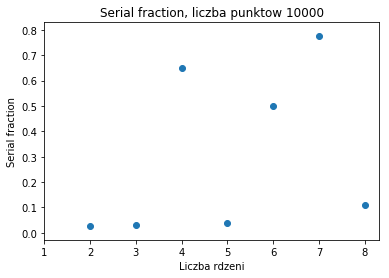

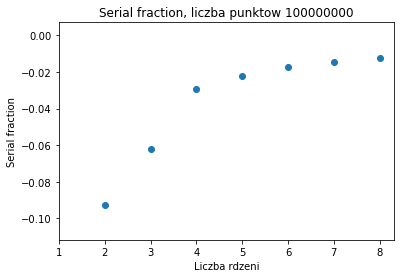

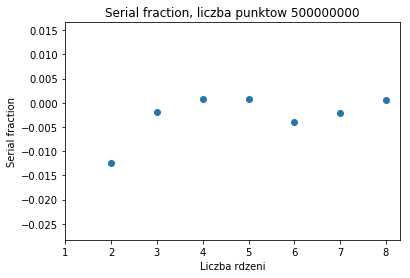

In [389]:
plot_serialfraction(first_group, first_mean, scalable=False)
plot_serialfraction(second_group, second_mean, scalable=False)
plot_serialfraction(last_group, last_mean, scalable=False)